In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# na_values=['?'] - convert missing data(?) into NaN
df=pd.read_csv('mammographic_masses.data.txt',na_values=['?'], 
               names=['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
df.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [16]:
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


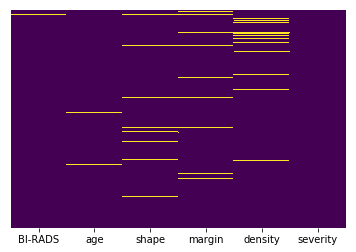

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
# drop the null values
df.dropna(inplace=True)

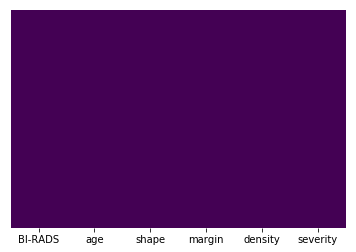

In [57]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

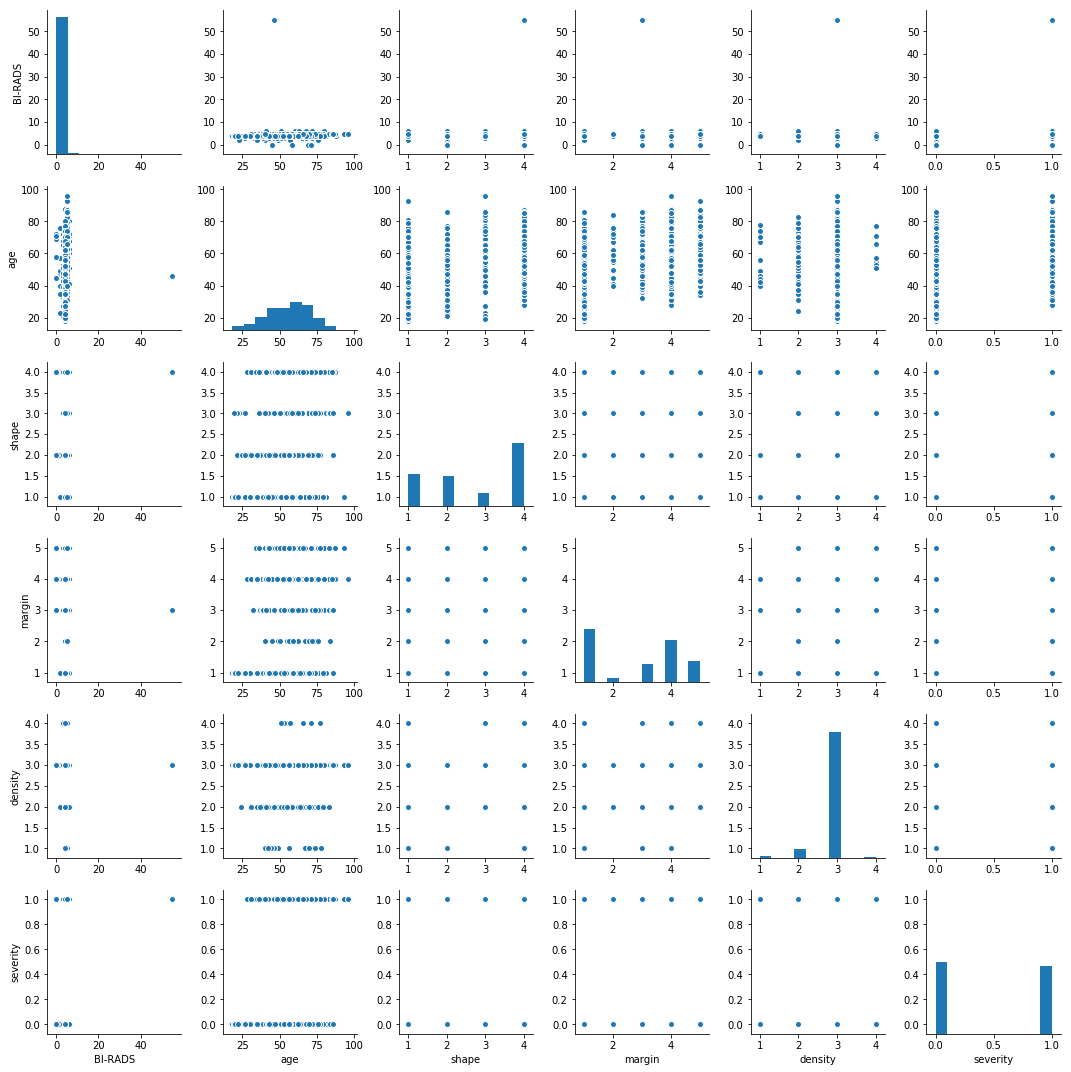

In [26]:
sns.pairplot(df)

In [33]:
df.corr()

,BI-RADS,age,shape,margin,density,severity
BI-RADS,1.000000,0.094623,0.180120,0.157771,0.028356,0.223826
age,0.094623,1.000000,0.380096,0.420913,0.052417,0.455216
shape,0.180120,0.380096,1.000000,0.738014,0.073969,0.564763
margin,0.157771,0.420913,0.738014,1.000000,0.124860,0.574498
density,0.028356,0.052417,0.073969,0.124860,1.000000,0.068651
severity,0.223826,0.455216,0.564763,0.574498,0.068651,1.000000


In [58]:
df.drop(df[['BI-RADS','margin']],axis=1, inplace=True)


In [59]:
df.head()

,age,shape,density,severity
0,67.0,3.0,3.0,1
2,58.0,4.0,3.0,1
3,28.0,1.0,3.0,0
8,57.0,1.0,3.0,1
10,76.0,1.0,3.0,1


In [64]:
df['shape'].unique()

array([ 3.,  4.,  1.,  2.])

# train the data

In [69]:
X=df[['age','shape','density']]
y=df['severity']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# standardize the variables

In [79]:
#Because the KNN classifier predicts the class of a given test 
#observation by identifying the observations that are nearest 
#to it, the scale of the variables matters. Any variables that 
#are on a large scale will have a much larger effect on the 
#distance between the observations, and hence on the KNN 
#classifier, than variables that are on a small scale.

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [124]:
X1=df[['age','shape','density']]
y1=df['severity']

In [125]:
scaler_tr=scaler.fit_transform(X1,y1)

In [126]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

# 1, logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
lorm=LogisticRegression()

In [122]:
lorm.fit(X_train, y_train)
pred_lorm=lorm.predict(X_test)
print (cm(y_test, pred_lorm))
print (cr(y_test, pred_lorm))

[[107  26]
 [ 16 100]]
             precision    recall  f1-score   support

          0       0.87      0.80      0.84       133
          1       0.79      0.86      0.83       116

avg / total       0.83      0.83      0.83       249



In [121]:
# what if i use standardized data for logistic regression?

In [127]:
lorm.fit(X1_train, y1_train)
pred_lorm=lorm.predict(X1_test)
print (cm(y1_test, pred_lorm))
print (cr(y1_test, pred_lorm))

[[107  26]
 [ 16 100]]
             precision    recall  f1-score   support

          0       0.87      0.80      0.84       133
          1       0.79      0.86      0.83       116

avg / total       0.83      0.83      0.83       249



# 2. KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn=KNeighborsClassifier()

In [105]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
pred_knn=knn.predict(X1_test)

In [109]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_knn=knn.predict(X1_test)
    error_rate.append(np.mean(pred_knn != y_test))

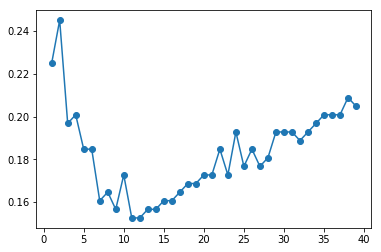

In [111]:
plt.plot(range(1,40),error_rate, marker='o')

In [ ]:
# looks 11 or 12 is the best one

In [116]:
for i in range (10,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_knn=knn.predict(X1_test)
    print (cm(y1_test, pred_knn))
    print (cr(y1_test, pred_knn))

[[112  21]
 [ 22  94]]
             precision    recall  f1-score   support

          0       0.84      0.84      0.84       133
          1       0.82      0.81      0.81       116

avg / total       0.83      0.83      0.83       249

[[109  24]
 [ 14 102]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.85       133
          1       0.81      0.88      0.84       116

avg / total       0.85      0.85      0.85       249

[[110  23]
 [ 15 101]]
             precision    recall  f1-score   support

          0       0.88      0.83      0.85       133
          1       0.81      0.87      0.84       116

avg / total       0.85      0.85      0.85       249

[[106  27]
 [ 12 104]]
             precision    recall  f1-score   support

          0       0.90      0.80      0.84       133
          1       0.79      0.90      0.84       116

avg / total       0.85      0.84      0.84       249

[[111  22]
 [ 17  99]]
             precision   

In [117]:
# try to pick a bad ones
for i in range (1,5):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_knn=knn.predict(X1_test)
    print (cm(y1_test, pred_knn))
    print (cr(y1_test, pred_knn))

[[103  30]
 [ 26  90]]
             precision    recall  f1-score   support

          0       0.80      0.77      0.79       133
          1       0.75      0.78      0.76       116

avg / total       0.78      0.78      0.78       249

[[119  14]
 [ 47  69]]
             precision    recall  f1-score   support

          0       0.72      0.89      0.80       133
          1       0.83      0.59      0.69       116

avg / total       0.77      0.76      0.75       249

[[106  27]
 [ 22  94]]
             precision    recall  f1-score   support

          0       0.83      0.80      0.81       133
          1       0.78      0.81      0.79       116

avg / total       0.80      0.80      0.80       249

[[116  17]
 [ 33  83]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       133
          1       0.83      0.72      0.77       116

avg / total       0.80      0.80      0.80       249



In [118]:
# huh, here i did not use standardize data for X
# and the result is similar
for i in range (10,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_knn=knn.predict(X_test)
    print (cm(y_test, pred_knn))
    print (cr(y_test, pred_knn))

[[112  21]
 [ 22  94]]
             precision    recall  f1-score   support

          0       0.84      0.84      0.84       133
          1       0.82      0.81      0.81       116

avg / total       0.83      0.83      0.83       249

[[109  24]
 [ 14 102]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.85       133
          1       0.81      0.88      0.84       116

avg / total       0.85      0.85      0.85       249

[[110  23]
 [ 15 101]]
             precision    recall  f1-score   support

          0       0.88      0.83      0.85       133
          1       0.81      0.87      0.84       116

avg / total       0.85      0.85      0.85       249

[[106  27]
 [ 12 104]]
             precision    recall  f1-score   support

          0       0.90      0.80      0.84       133
          1       0.79      0.90      0.84       116

avg / total       0.85      0.84      0.84       249

[[111  22]
 [ 17  99]]
             precision   

In [119]:
for i in range (1,5):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_knn=knn.predict(X_test)
    print (cm(y_test, pred_knn))
    print (cr(y_test, pred_knn))

[[103  30]
 [ 26  90]]
             precision    recall  f1-score   support

          0       0.80      0.77      0.79       133
          1       0.75      0.78      0.76       116

avg / total       0.78      0.78      0.78       249

[[119  14]
 [ 47  69]]
             precision    recall  f1-score   support

          0       0.72      0.89      0.80       133
          1       0.83      0.59      0.69       116

avg / total       0.77      0.76      0.75       249

[[106  27]
 [ 22  94]]
             precision    recall  f1-score   support

          0       0.83      0.80      0.81       133
          1       0.78      0.81      0.79       116

avg / total       0.80      0.80      0.80       249

[[116  17]
 [ 33  83]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       133
          1       0.83      0.72      0.77       116

avg / total       0.80      0.80      0.80       249



# 3, Decision Trees

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtree=DecisionTreeClassifier()

In [134]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
pred_dtree=dtree.predict(X_test)

In [137]:
print (cm(y_test, pred_dtree))
print (cr(y_test, pred_dtree))

[[106  27]
 [ 26  90]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80       133
          1       0.77      0.78      0.77       116

avg / total       0.79      0.79      0.79       249



In [138]:
# what id i use standardized data?
tree=DecisionTreeClassifier()
dtree.fit(X1_train, y1_train)
pred_dtree=dtree.predict(X1_test)
print (cm(y1_test, pred_dtree))
print (cr(y1_test, pred_dtree))

[[107  26]
 [ 26  90]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80       133
          1       0.78      0.78      0.78       116

avg / total       0.79      0.79      0.79       249



In [146]:
from IPthon.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
from pydotplus import graph_from_dot_data

In [149]:
dot_data = StringIO()  
tree.export_graphviz(dtree, out_file=dot_data,  
                         feature_names=X)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ValueError: Length of feature_names, 830 does not match number of features, 3

# 4, Random forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc=RandomForestClassifier() # n_estimator default =10
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
print (cm(y_test, pred_rfc))
print (cr(y_test, pred_rfc))

[[108  25]
 [ 23  93]]
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       133
          1       0.79      0.80      0.79       116

avg / total       0.81      0.81      0.81       249



In [155]:
rfc=RandomForestClassifier(n_estimators=1000) 
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
print (cm(y_test, pred_rfc))
print (cr(y_test, pred_rfc))

[[107  26]
 [ 18  98]]
             precision    recall  f1-score   support

          0       0.86      0.80      0.83       133
          1       0.79      0.84      0.82       116

avg / total       0.83      0.82      0.82       249



In [156]:
# if i use standardized data
rfc=RandomForestClassifier() # n_estimator default =10
rfc.fit(X1_train, y1_train)
pred_rfc=rfc.predict(X1_test)
print (cm(y1_test, pred_rfc))
print (cr(y1_test, pred_rfc))

[[106  27]
 [ 23  93]]
             precision    recall  f1-score   support

          0       0.82      0.80      0.81       133
          1       0.78      0.80      0.79       116

avg / total       0.80      0.80      0.80       249



# 5, SVM -support vector machine

In [157]:
from sklearn.svm import SVC

In [158]:
svcm=SVC()
svcm.fit(X_train, y_train)
pred_svcm=svcm.predict(X_test)
print (cm(y_test, pred_svcm))
print (cr(y_test, pred_svcm))

[[105  28]
 [ 17  99]]
             precision    recall  f1-score   support

          0       0.86      0.79      0.82       133
          1       0.78      0.85      0.81       116

avg / total       0.82      0.82      0.82       249



In [159]:
# used standardlized data
svcm=SVC()
svcm.fit(X1_train, y1_train)
pred_svcm=svcm.predict(X1_test)
print (cm(y1_test, pred_svcm))
print (cr(y1_test, pred_svcm))

[[105  28]
 [ 17  99]]
             precision    recall  f1-score   support

          0       0.86      0.79      0.82       133
          1       0.78      0.85      0.81       116

avg / total       0.82      0.82      0.82       249



In [160]:
from sklearn.model_selection import GridSearchCV

In [167]:
para_grid={'C':[0.1,1,10,100],'gamma': [1,0.1,0.01,0.001]}
gscv=GridSearchCV(SVC(), para_grid,verbose=2)
gscv.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [172]:
pred_gscv=gscv.predict(X_test)
print (cm(y_test, pred_gscv))
print (cr(y_test, pred_gscv))

[[108  25]
 [ 16 100]]
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       133
          1       0.80      0.86      0.83       116

avg / total       0.84      0.84      0.84       249



In [181]:
# find the best parameter and estimator

In [182]:
gscv.best_params_

{'C': 100, 'gamma': 0.001}

In [183]:
gscv.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
# use them
para_grid={'C':[100],'gamma': [0.001]}
gscv=GridSearchCV(SVC(), para_grid,verbose=2)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100], 'gamma': [0.001]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=2)

In [186]:
pred_gscv=gscv.predict(X_test)
print (cm(y_test, pred_gscv))
print (cr(y_test, pred_gscv))

[[108  25]
 [ 16 100]]
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       133
          1       0.80      0.86      0.83       116

avg / total       0.84      0.84      0.84       249



In [175]:
#use standardlized data
gscv.fit(X1_train, y1_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [176]:
pred_gscv=gscv.predict(X1_test)
print (cm(y1_test, pred_gscv))
print (cr(y1_test, pred_gscv))

[[108  25]
 [ 16 100]]
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       133
          1       0.80      0.86      0.83       116

avg / total       0.84      0.84      0.84       249



In [187]:
# used best parameter and estimator
pred_gscv=gscv.predict(X1_test)
print (cm(y1_test, pred_gscv))
print (cr(y1_test, pred_gscv))

[[108  25]
 [ 16 100]]
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       133
          1       0.80      0.86      0.83       116

avg / total       0.84      0.84      0.84       249



## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? Hint: you'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [188]:
from sklearn.naive_bayes import MultinomialNB

In [208]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
pred_mnb=mnb.predict(X_test)
print (cm(y_test, pred_mnb))
print (cr(y_test, pred_mnb))

[[101  32]
 [ 18  98]]
             precision    recall  f1-score   support

          0       0.85      0.76      0.80       133
          1       0.75      0.84      0.80       116

avg / total       0.80      0.80      0.80       249



In [ ]:
# use standdardized data

In [209]:
mnb=MultinomialNB()
mnb.fit(X1_train, y1_train)
pred_mnb=mnb.predict(X1_test)
print (cm(y1_test, pred_mnb))
print (cr(y1_test, pred_mnb))

[[101  32]
 [ 18  98]]
             precision    recall  f1-score   support

          0       0.85      0.76      0.80       133
          1       0.75      0.84      0.80       116

avg / total       0.80      0.80      0.80       249



# Neural Networks